### Команда: Форін Дмитро, Спекторовська Лада КА-24

### 1) Представити початковi данi графiчно.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc

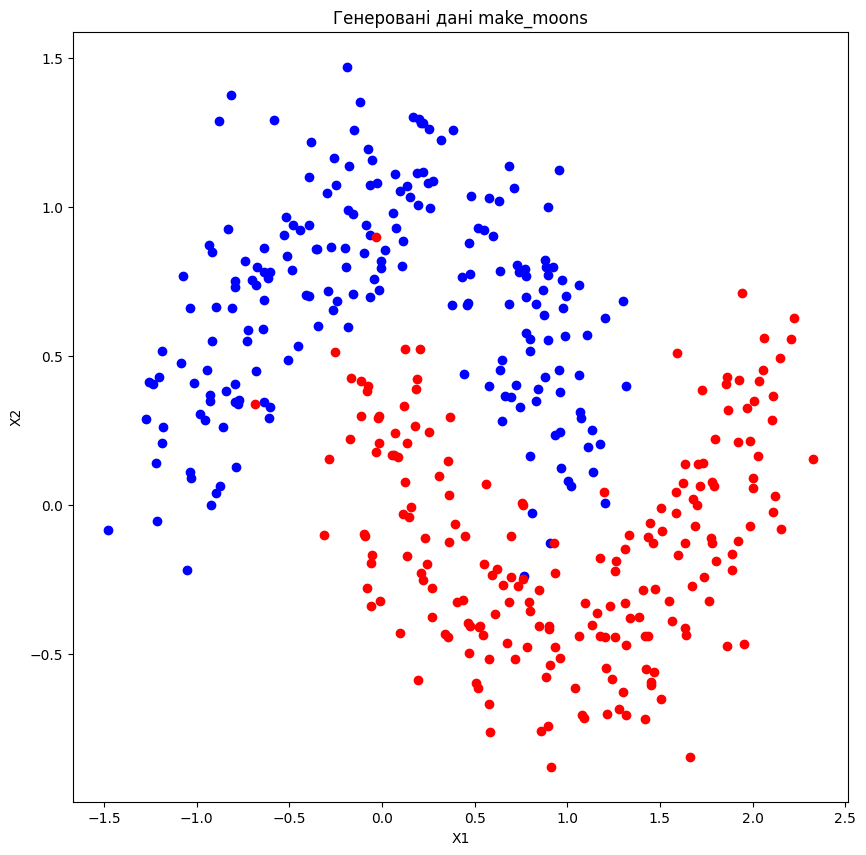

In [2]:
X, y= make_moons(n_samples=400, noise=0.2,random_state=50)
plt.figure(figsize=(10,10))
plt.scatter(X[y==0,0],X[y==0,1], color='blue', label='class 0')
plt.scatter(X[y==1,0],X[y==1,1], color='red', label='class 0')
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Генеровані дані make_moons')
plt.show()

### Скорегуємо вхідні ознаки так щоб вони були додатними, так як модель MultinomialNB не працює з від'ємними данними

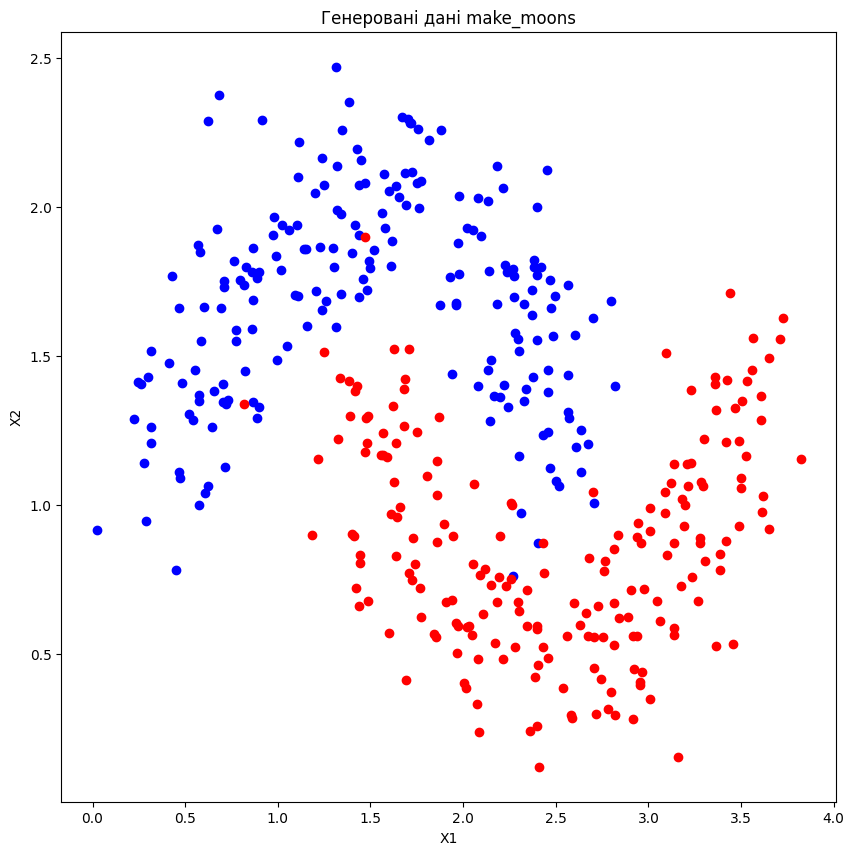

In [3]:
X[:,0]+=1.5
X[:,1]+=1
plt.figure(figsize=(10,10))
plt.scatter(X[y==0,0],X[y==0,1], color='blue', label='class 0')
plt.scatter(X[y==1,0],X[y==1,1], color='red', label='class 0')
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Генеровані дані make_moons')
plt.show()

### 2) Розбити данi на навчальний та валiдацiйний набори.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 3) Побудувати на навчальному наборi даних моделi класифiкацiї або регресiї заданi згiдно з варiантом.

In [5]:
modelGaus=GaussianNB()
modelGaus.fit(X_train, y_train)

GaussianNB()

In [6]:
modelPolinom = MultinomialNB()
modelPolinom.fit(X_train, y_train)

MultinomialNB()

### 4) Представити моделi графiчно

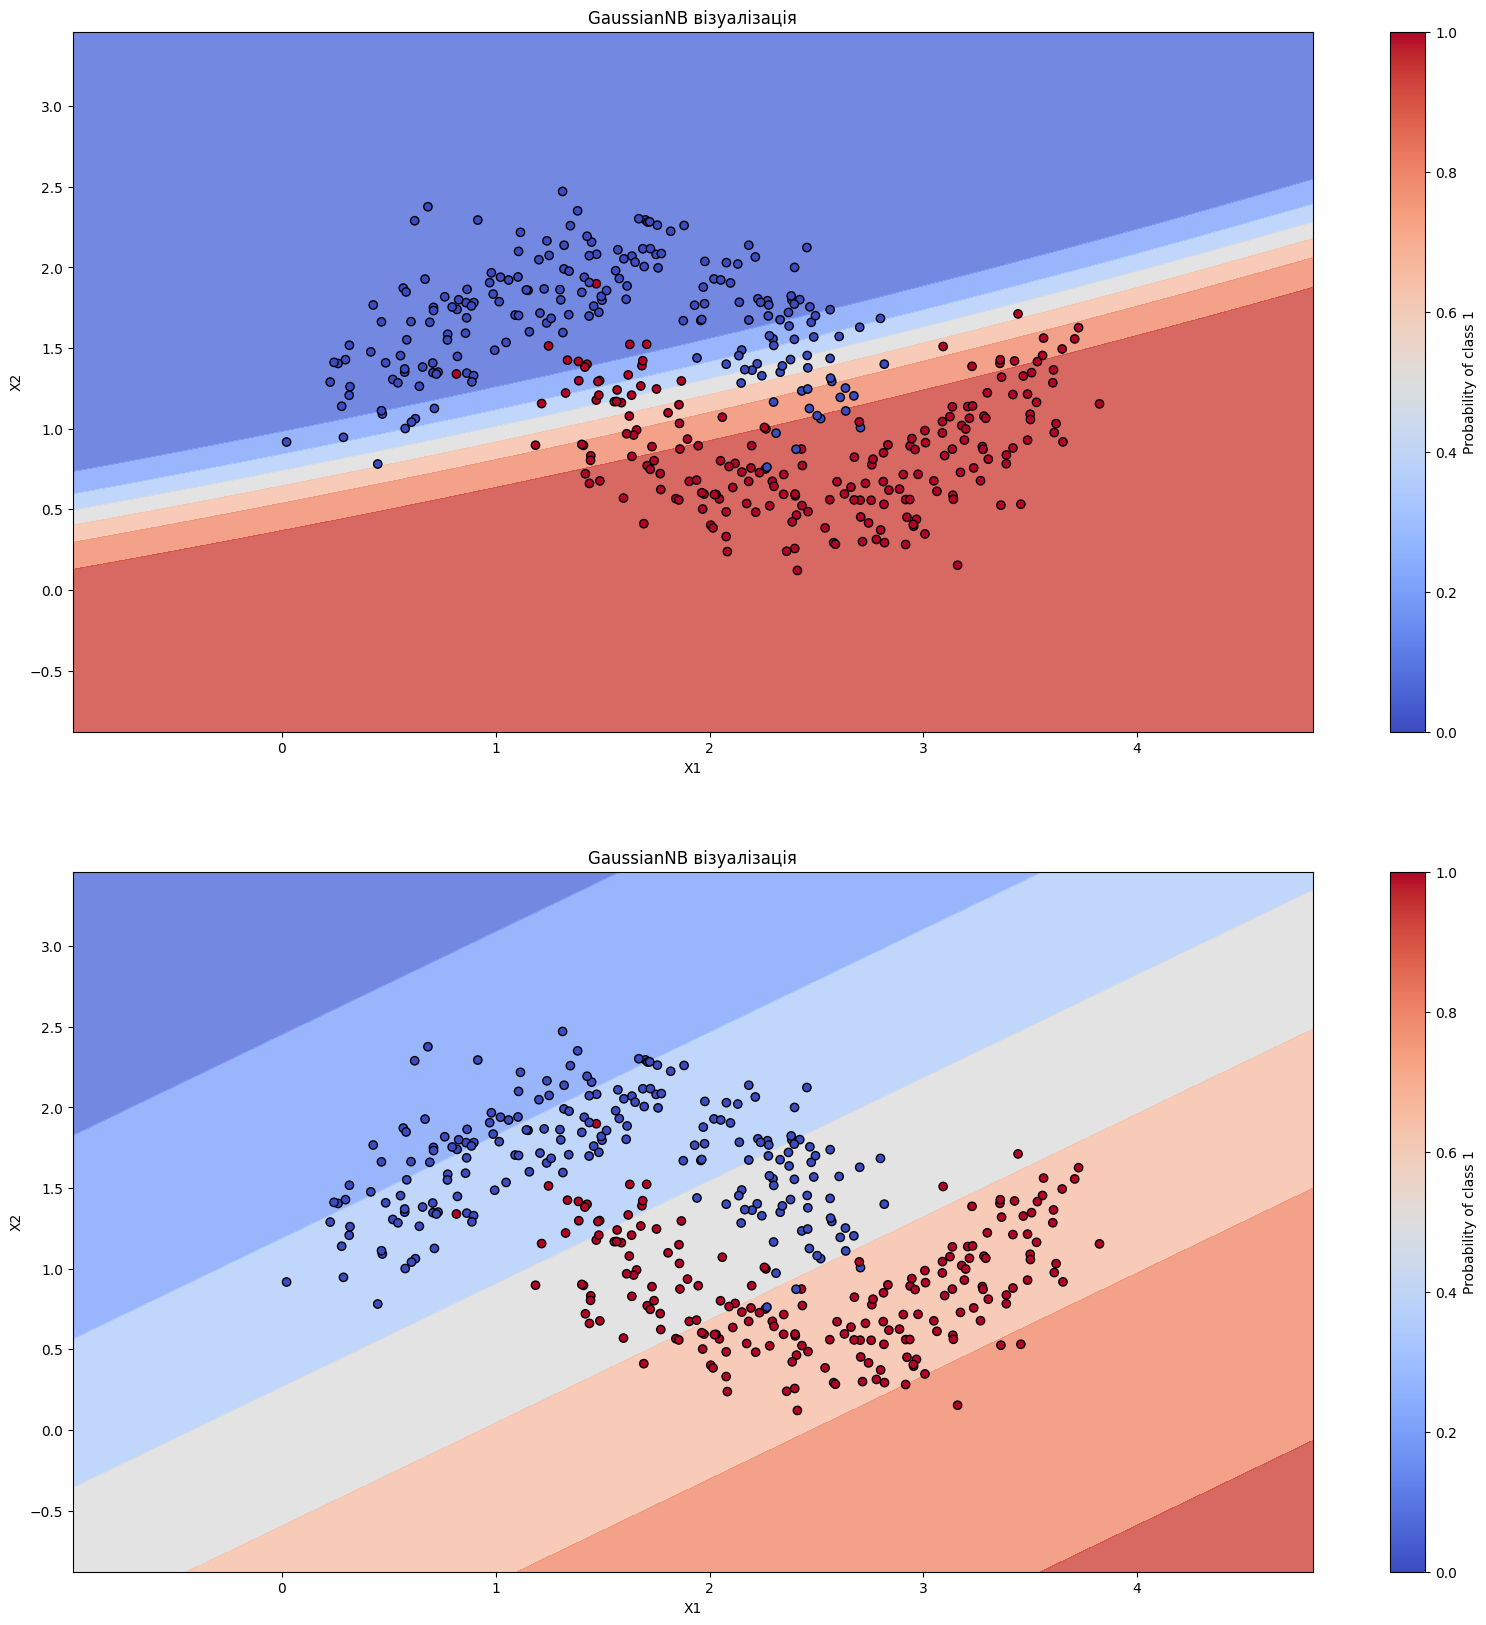

In [7]:
x1_min = X[:, 0].min() - 1
x1_max = X[:, 0].max() + 1
x2_min = X[:, 1].min() - 1
x2_max = X[:, 1].max() + 1
x1_axis, x2_axis = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
#https://www.geeksforgeeks.org/numpy-meshgrid-function/

# Прогнозування ймовірностей класів на сітці
ZG = modelGaus.predict_proba(np.c_[x1_axis.ravel(), x2_axis.ravel()])
#https://www.geeksforgeeks.org/numpy-ravel-python/
ZG = ZG[:, 1].reshape(x1_axis.shape)  # Ймовірність належності до класу 1

ZP = modelPolinom.predict_proba(np.c_[x1_axis.ravel(), x2_axis.ravel()])
ZP = ZP[:, 1].reshape(x1_axis.shape)

# Створюємо графік
plt.figure(figsize=(20, 20))
plt.subplot(2,1,1)
plt.contourf(x1_axis, x2_axis, ZG, alpha=0.8, cmap='coolwarm')# alpha - прозорість
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='coolwarm')
plt.title('GaussianNB візуалізація')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='Probability of class 1')
plt.subplot(2,1,2)
plt.contourf(x1_axis, x2_axis, ZP, alpha=0.8, cmap='coolwarm')# alpha - прозорість
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='coolwarm')
plt.title('GaussianNB візуалізація')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='Probability of class 1')
plt.show()

### 5)Виконати прогнози на основi побудованих моделей.

In [8]:
y_predGaus=modelGaus.predict(X_test)
y_predPol=modelPolinom.predict(X_test)

### 6)Для кожної з моделей оцiнити, чи має мiсце перенавчання.

In [9]:
print("train score Gauss: ", modelGaus.score(X_train, y_train))
print("test score Gauss: ", modelGaus.score(X_test, y_test))
print("train score Polinom: ", modelPolinom.score(X_train, y_train))
print("test score Polinom: ", modelPolinom.score(X_test, y_test))

train score Gauss:  0.86875
test score Gauss:  0.9
train score Polinom:  0.84375
test score Polinom:  0.8625


Як можна побачити відсоток правильних відповідей є доволі високим як на валідаційному так і на тестовому наборі. Також відсоток правильних відповідей на тестовому наборі не є значно меншим ніж на навчальному, що свідчить про відсутність перенавчання моделі. 
Причому модель GaussianNB дає кращий результат ніж MultinomialNB. 

### 7) Розрахувати додатковi результати моделей, згiдно з варiантом. Варіант 11 - Для кожної моделi розрахувати апостерiорнi iмовiрностi для тестового прикладу, використовуючи метод predict_proba.

Aposterior probability Gauss      class_0   class_1
0   0.002677  0.997323
1   0.930049  0.069951
2   0.997082  0.002918
3   0.212382  0.787618
4   0.815021  0.184979
..       ...       ...
75  0.993197  0.006803
76  0.994636  0.005364
77  0.000670  0.999330
78  0.075671  0.924329
79  0.068114  0.931886

[80 rows x 2 columns]
Aposterior probability Polinom 
      class_0   class_1
0   0.307922  0.692078
1   0.555903  0.444097
2   0.743133  0.256867
3   0.487310  0.512690
4   0.524458  0.475542
..       ...       ...
75  0.659460  0.340540
76  0.667953  0.332047
77  0.272343  0.727657
78  0.415461  0.584539
79  0.351704  0.648296

[80 rows x 2 columns]


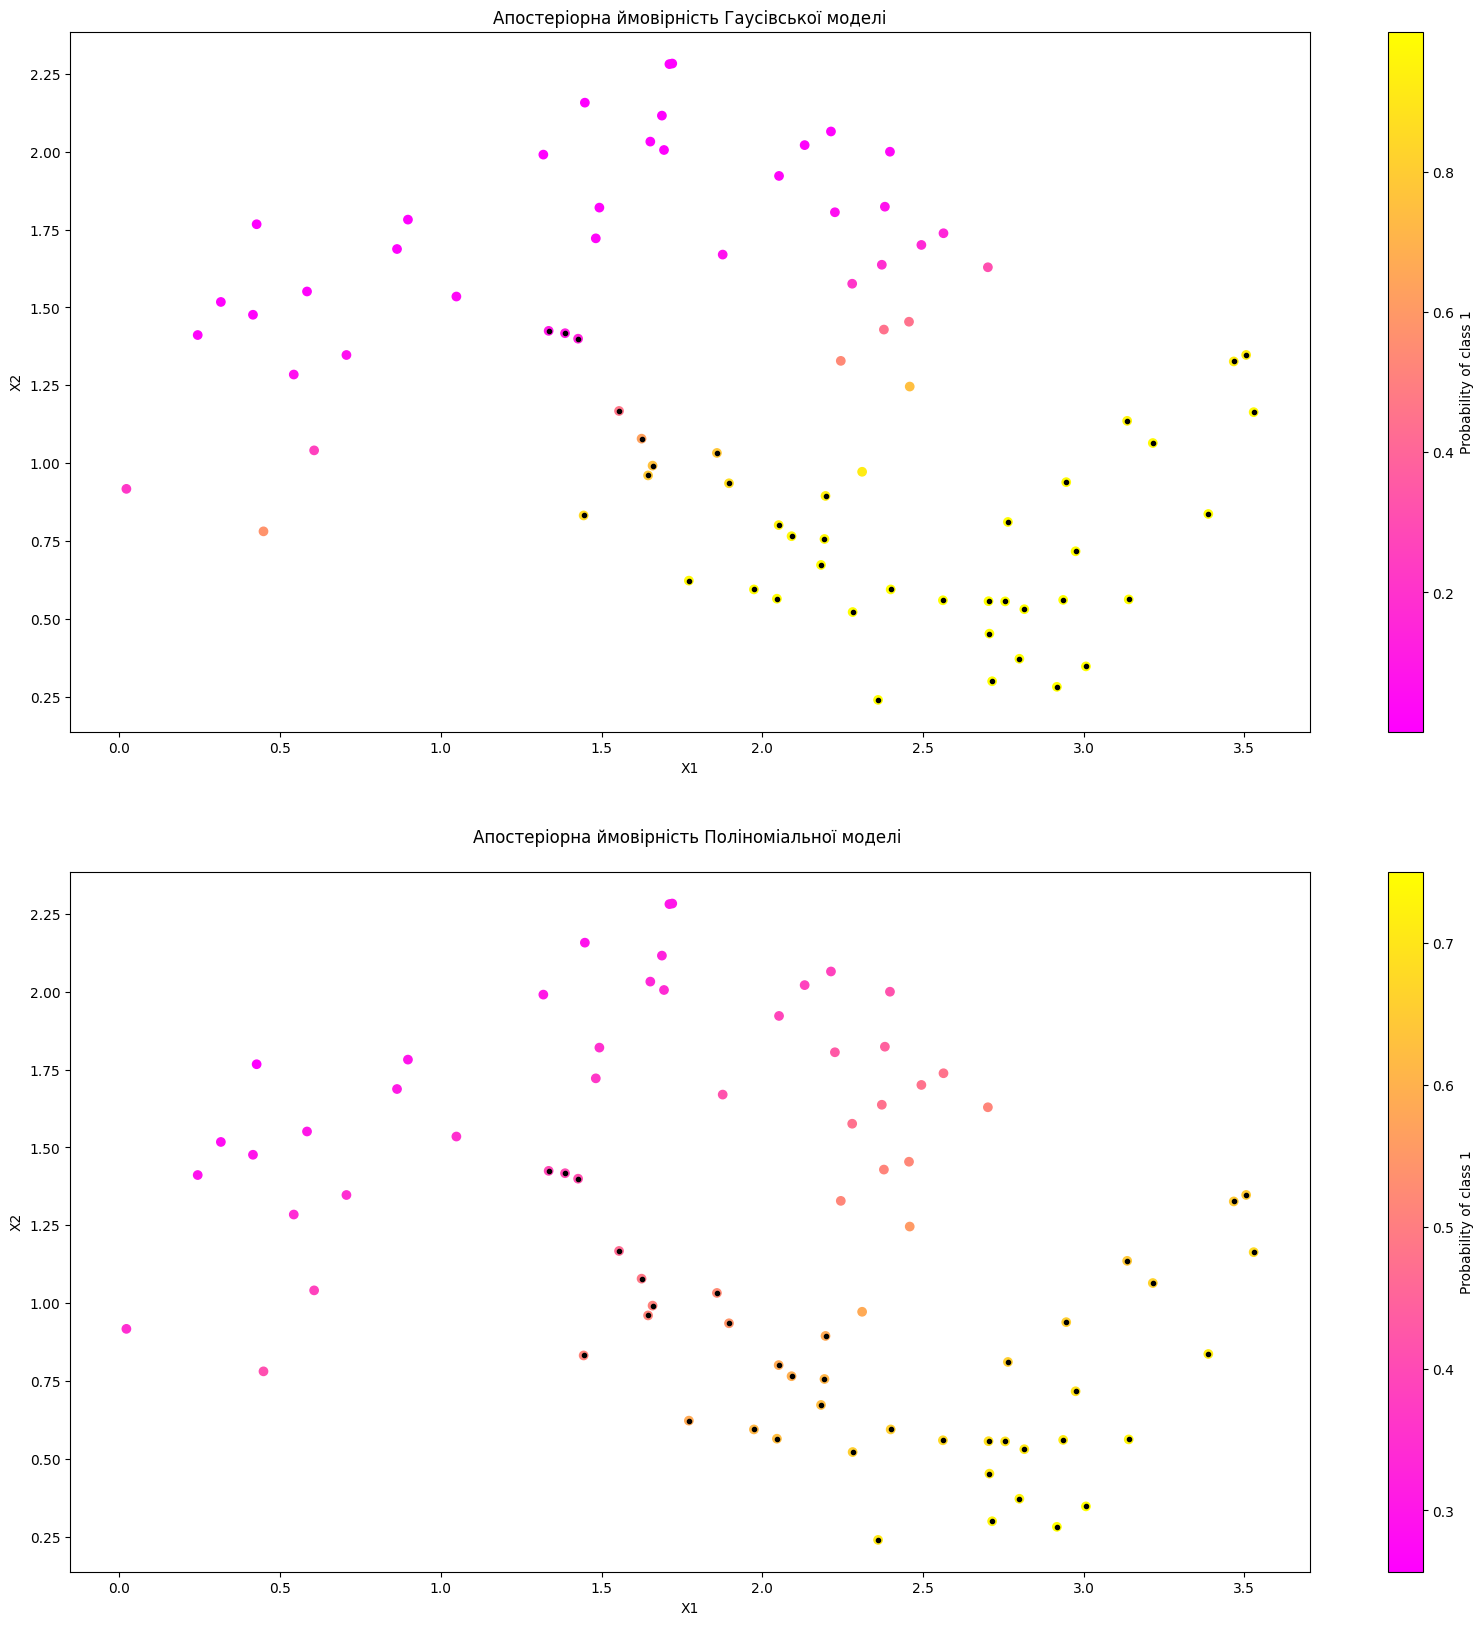

In [10]:
apost_prob_Gauss=modelGaus.predict_proba(X_test)
tempG=pd.DataFrame({'class_0':apost_prob_Gauss[:,0], 'class_1':apost_prob_Gauss[:,1]})
print("Aposterior probability Gauss", tempG)
apost_prob_Pol=modelPolinom.predict_proba(X_test)
tempP=pd.DataFrame({'class_0':apost_prob_Pol[:,0], 'class_1':apost_prob_Pol[:,1]})
print("Aposterior probability Polinom \n", tempP)
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=tempG['class_1'], cmap='spring')# yellow stands for 1 pink stands for 0
plt.colorbar(label='Probability of class 1')
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1], marker='.', color='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Апостеріорна ймовірність Гаусівської моделі')
plt.subplot(2,1,2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=tempP['class_1'], cmap='spring')# yellow stands for 1 pink stands for 0
plt.colorbar(label='Probability of class 1')
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1], marker='.', color='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Апостеріорна ймовірність Поліноміальної моделі \n')
plt.show()


### 8) В задачах класифiкацiї побудувати границi рiшень графiчно для кожної з моделей.

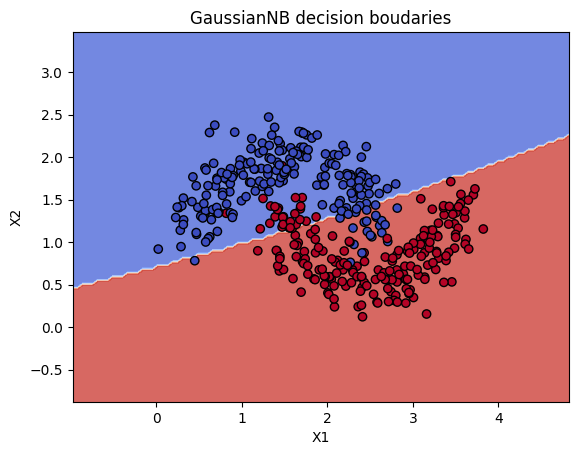

In [11]:
display = DecisionBoundaryDisplay.from_estimator(modelGaus, X, response_method="predict", xlabel = 'X1', ylabel='X2', alpha=0.8, cmap='coolwarm')
display.ax_.scatter(X[:,0], X[:,1], c=y, edgecolor="k",cmap='coolwarm')
plt.title('GaussianNB decision boudaries')
plt.show()

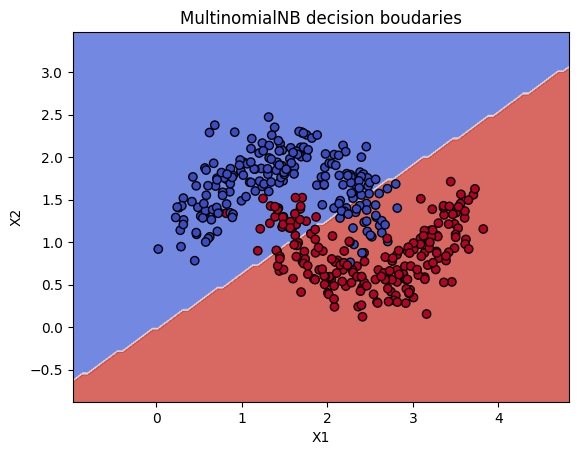

In [12]:
display = DecisionBoundaryDisplay.from_estimator(modelPolinom, X, response_method="predict", xlabel = 'X1', ylabel='X2', alpha=0.8, cmap='coolwarm')
display.ax_.scatter(X[:,0], X[:,1], c=y, edgecolor="k",cmap='coolwarm')
plt.title('MultinomialNB decision boudaries')
plt.show()

9) В задачах класифiкацiї розрахувати для кожної моделi значення наступних критерiїв якостi, окремо на навчальнiй та валiдацiйнiй множинах:  
    • матрицю неточностей (confusion matrix)  
    • точнiсть (precision)  
    • повноту (recall)  
    • мiру F1 (F1 score)  
    • побудувати криву точностi-повноти (precision-recall (PR) curve), ROC-криву, показник AUC.

GaussConfMatrixTrain:  [[142  19]
 [ 23 136]]
GaussPrecisionTrain:  0.8774193548387097
GaussRecallTrain:  0.8553459119496856
GaussF1Train:  0.8662420382165605
GaussConfMatrixTest:  [[35  4]
 [ 4 37]]
GaussPrecisionTest:  0.9024390243902439
GaussRecallTest:  0.9024390243902439
GaussF1Test:  0.9024390243902439
PolinomConfMatrixTrain:  [[137  24]
 [ 26 133]]
PolinomPrecisionTrain:  0.8471337579617835
PolinomRecallTrain:  0.8364779874213837
PolinomF1Train:  0.8417721518987342
PolinomConfMatrixTest:  [[33  6]
 [ 5 36]]
PolinomPrecisionTest:  0.8571428571428571
PolinomRecallTest:  0.8780487804878049
PolinomF1Test:  0.8674698795180723
train_auc_Gaus:  0.8686667447947185
train_auc_Pol:  0.8437048322200085
test_auc_Gaus:  0.8686667447947185
test_auc_Pol:  0.8437048322200085


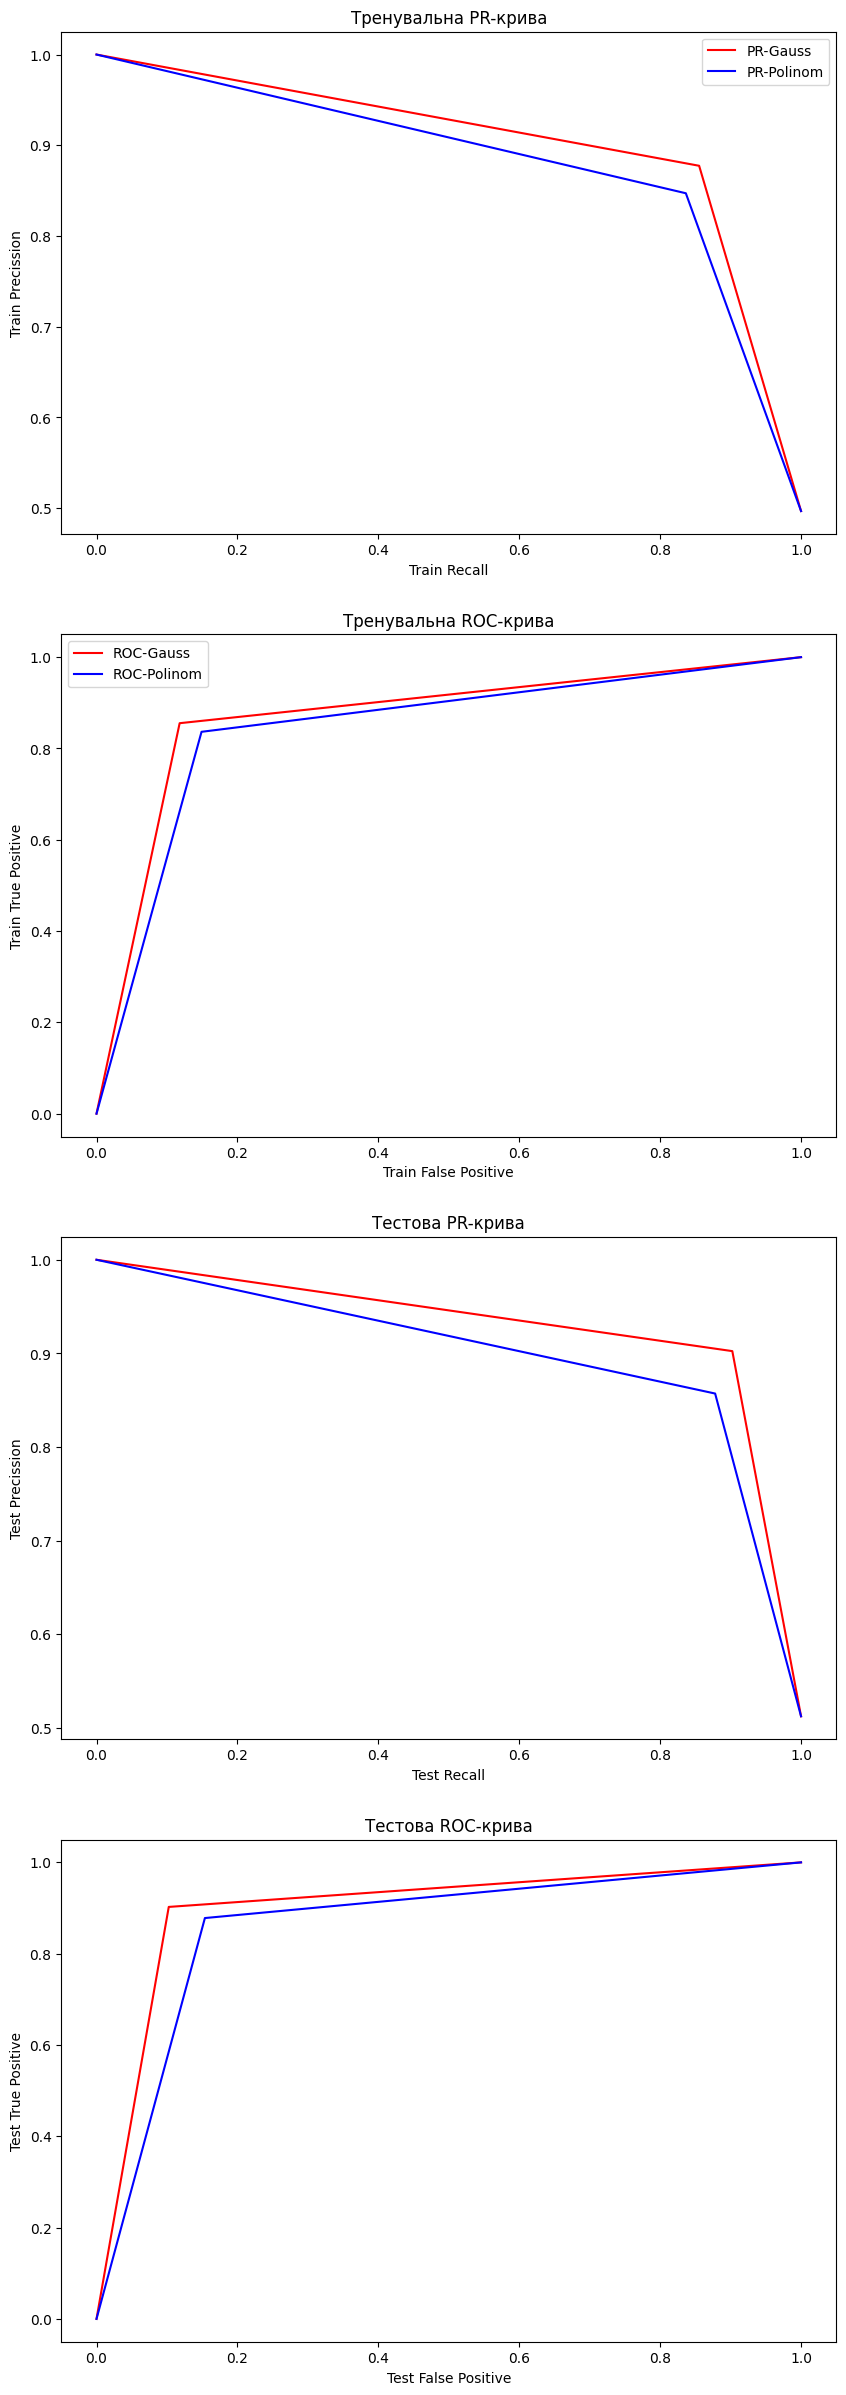

In [13]:
y_predtrain_Gaus=modelGaus.predict(X_train)
GaussConfMatrixTrain=confusion_matrix(y_train, y_predtrain_Gaus)
GaussPrecisionTrain=precision_score(y_train, y_predtrain_Gaus)
GaussRecallTrain=recall_score(y_train, y_predtrain_Gaus)
GaussF1Train=f1_score(y_train, y_predtrain_Gaus)
y_predtest_Gaus=modelGaus.predict(X_test)
GaussConfMatrixTest=confusion_matrix(y_test, y_predtest_Gaus)
GaussPrecisionTest=precision_score(y_test, y_predtest_Gaus)
GaussRecallTest=recall_score(y_test, y_predtest_Gaus)
GaussF1Test=f1_score(y_test, y_predtest_Gaus)
print("GaussConfMatrixTrain: ",GaussConfMatrixTrain)
print("GaussPrecisionTrain: ", GaussPrecisionTrain)
print("GaussRecallTrain: ", GaussRecallTrain)
print("GaussF1Train: ", GaussF1Train)
print("GaussConfMatrixTest: ",GaussConfMatrixTest)
print("GaussPrecisionTest: ", GaussPrecisionTest)
print("GaussRecallTest: ", GaussRecallTest)
print("GaussF1Test: ", GaussF1Test)
y_predtrain_Pol=modelPolinom.predict(X_train)
PolinomConfMatrixTrain=confusion_matrix(y_train, y_predtrain_Pol)
PolinomPrecisionTrain=precision_score(y_train, y_predtrain_Pol)
PolinomRecallTrain=recall_score(y_train, y_predtrain_Pol)
PolinomF1Train=f1_score(y_train, y_predtrain_Pol)

y_predtest_Pol=modelPolinom.predict(X_test)
PolinomConfMatrixTest=confusion_matrix(y_test, y_predtest_Pol)
PolinomPrecisionTest=precision_score(y_test, y_predtest_Pol)
PolinomRecallTest=recall_score(y_test, y_predtest_Pol)
PolinomF1Test=f1_score(y_test, y_predtest_Pol)
print("PolinomConfMatrixTrain: ",PolinomConfMatrixTrain)
print("PolinomPrecisionTrain: ", PolinomPrecisionTrain)
print("PolinomRecallTrain: ", PolinomRecallTrain)
print("PolinomF1Train: ", PolinomF1Train)
print("PolinomConfMatrixTest: ", PolinomConfMatrixTest)
print("PolinomPrecisionTest: ", PolinomPrecisionTest)
print("PolinomRecallTest: ", PolinomRecallTest)
print("PolinomF1Test: ", PolinomF1Test)

PRprecissionTrain_Gaus,PRrecallTrain_Gaus, _=precision_recall_curve(y_train, y_predtrain_Gaus)
fpr_train_Gaus, tpr_train_Gaus, _ = roc_curve(y_train, y_predtrain_Gaus)
train_auc_Gaus=auc(fpr_train_Gaus, tpr_train_Gaus)
PRprecissionTrain_Pol,PRrecallTrain_Pol, _=precision_recall_curve(y_train, y_predtrain_Pol)
fpr_train_Pol, tpr_train_Pol, _ = roc_curve(y_train, y_predtrain_Pol)
train_auc_Pol=auc(fpr_train_Pol, tpr_train_Pol)
print("train_auc_Gaus: ", train_auc_Gaus)
print("train_auc_Pol: ", train_auc_Pol)
PRprecissionTest_Gaus,PRrecallTest_Gaus, _=precision_recall_curve(y_test, y_predtest_Gaus)
fpr_test_Gaus, tpr_test_Gaus, _ = roc_curve(y_test, y_predtest_Gaus)
test_auc_Gaus=auc(fpr_test_Gaus, tpr_train_Gaus)
PRprecissionTest_Pol,PRrecallTest_Pol, _=precision_recall_curve(y_test, y_predtest_Pol)
fpr_test_Pol, tpr_test_Pol, _ = roc_curve(y_test, y_predtest_Pol)
test_auc_Pol=auc(fpr_test_Pol, tpr_test_Pol)
print("test_auc_Gaus: ", test_auc_Gaus)
print("test_auc_Pol: ", test_auc_Pol)

plt.figure(figsize=(10,30))
plt.subplot(4,1,1)
plt.plot(PRrecallTrain_Gaus, PRprecissionTrain_Gaus, color='red', label='PR-Gauss')
plt.plot(PRrecallTrain_Pol, PRprecissionTrain_Pol, color='blue', label='PR-Polinom')
plt.xlabel("Train Recall")
plt.ylabel("Train Precission")
plt.title("Тренувальна PR-крива")
plt.legend()
plt.subplot(4,1,2)
plt.plot(fpr_train_Gaus, tpr_train_Gaus, color='red', label='ROC-Gauss')
plt.plot(fpr_train_Pol, tpr_train_Pol, color='blue', label='ROC-Polinom')
plt.xlabel("Train False Positive")
plt.ylabel("Train True Positive")
plt.title("Тренувальна ROC-крива")
plt.legend()
plt.subplot(4,1,3)
plt.plot(PRrecallTest_Gaus, PRprecissionTest_Gaus, color='red', label='PR-Gauss')
plt.plot(PRrecallTest_Pol, PRprecissionTest_Pol, color='blue', label='PR-Polinom')
plt.xlabel("Test Recall")
plt.ylabel("Test Precission")
plt.title("Тестова PR-крива")
plt.subplot(4,1,4)
plt.plot(fpr_test_Gaus, tpr_test_Gaus, color='red', label='ROC-Gauss')
plt.plot(fpr_test_Pol, tpr_test_Pol, color='blue', label='ROC-Polinom')
plt.xlabel("Test False Positive")
plt.ylabel("Test True Positive")
plt.title("Тестова ROC-крива")
plt.show()

### 11) Спробувати виконати решiтчастий пошук (grid search) для пiдбору гiперпараметрiв моделей.

In [14]:
modelGausGrid=GaussianNB()
param_grid={
    'var_smoothing': np.logspace(0, -9, num=100) #100 значень від 1 до 10^(-9)
}
grid_search=GridSearchCV(estimator=modelGausGrid, param_grid=param_grid, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f"Grid best parameters: {grid_search.best_params_}")
print("Grid best accuracy: ", grid_search.best_score_)

Grid best parameters: {'var_smoothing': np.float64(0.0657933224657568)}
Grid best accuracy:  0.865625


In [15]:
best_grid=grid_search.best_estimator_
print("test score: ", best_grid.score(X_test, y_test))

test score:  0.9


### Для даної моделі grid search видав майже такі самі результати як і метод fit що пояснюється відносною простотою і грубустю моделі GaussianNB 

In [16]:
modelPolGrid=MultinomialNB()
param_grid={
    'alpha': np.linspace(0,5, 10),
    'fit_prior': [True, False]
}
grid_search_Pol=GridSearchCV(estimator=modelPolGrid, param_grid=param_grid, scoring='accuracy')
grid_search_Pol.fit(X_train, y_train)
print(f"Grid best parameters: {grid_search_Pol.best_params_}")
print("Grid best accuracy: ", grid_search_Pol.best_score_)

Grid best parameters: {'alpha': np.float64(0.0), 'fit_prior': True}
Grid best accuracy:  0.840625


In [17]:
best_grid_pol=grid_search_Pol.best_estimator_
print("test score: ", best_grid_pol.score(X_test, y_test))

test score:  0.8625


Як можна побачити для поліноміальної моделі метод grid_search дав трохи кращі результати на трнувальній вибірці та такіж результати на тестовій як і метод fit

### 12) Зробити висновки про якiсть роботи моделей на дослiджених даних. На основi критерiїв якостi спробувати обрати найкращу модель.

Як можна бачити з показників в пункті 9 на данному наборі даних модель GaussianNB переважає MultinomialNB по всіх показниках якості, тож в рамках данної задачі Гаусівська модель є оптимальнішою за поліноміальну.

### 13) Навчити моделi на пiдмножинах навчальних даних. Оцiнити, наскiльки розмiр навчальної множини впливає на якiсть моделi.


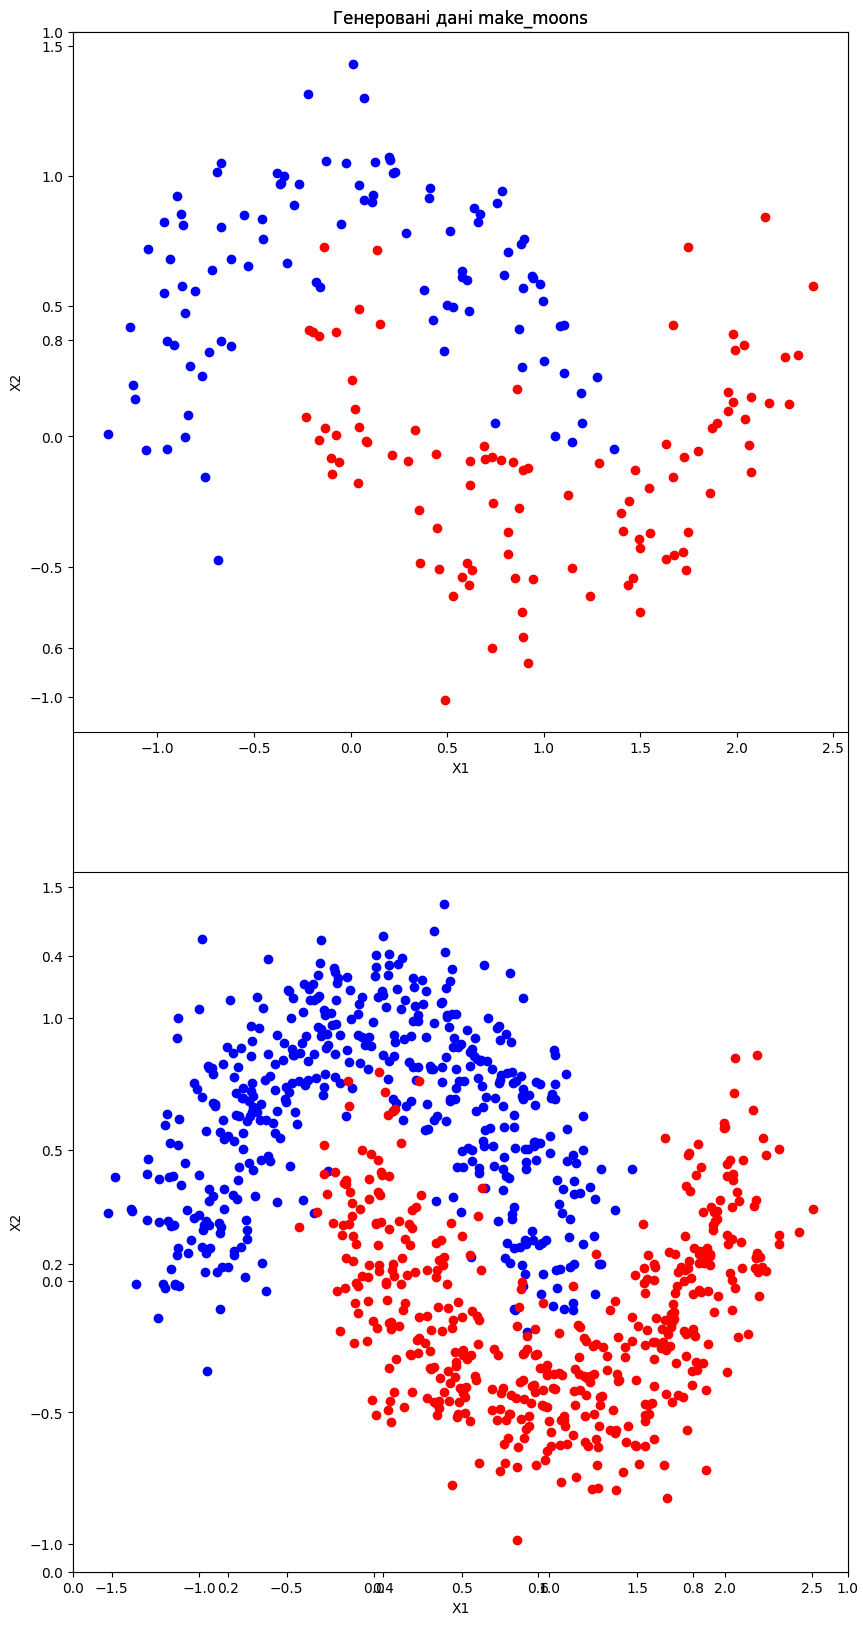

In [18]:
X1, y1= make_moons(n_samples=200, noise=0.2,random_state=50)
X2, y2= make_moons(n_samples=900, noise=0.2,random_state=50)
plt.figure(figsize=(10,20))
plt.title('Генеровані дані make_moons')
plt.subplot(2,1,1)
plt.title('Генеровані дані make_moons')
plt.scatter(X1[y1==0,0],X1[y1==0,1], color='blue', label='class 0')
plt.scatter(X1[y1==1,0],X1[y1==1,1], color='red', label='class 0')
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.subplot(2,1,2)
plt.scatter(X2[y2==0,0],X2[y2==0,1], color='blue', label='class 0')
plt.scatter(X2[y2==1,0],X2[y2==1,1], color='red', label='class 0')
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [89]:
X1[:,0]+=2
X1[:,1]+=2
X2[:,0]+=2
X2[:,1]+=2
X1_train, X1_test, y1_train, y1_test = train_test_split(X2, y2, test_size=0.2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X3, y3, test_size=0.2)


In [90]:
modelGaus1=GaussianNB()
modelGaus1.fit(X1_train, y1_train)
modelGaus2=GaussianNB()
modelGaus2.fit(X2_train, y2_train)

GaussianNB()

In [91]:
modelPol1=MultinomialNB()
modelPol1.fit(X1_train, y1_train)
modelPol2=MultinomialNB()
modelPol2.fit(X2_train, y2_train)

MultinomialNB()

In [93]:

print("test score Gauss200: ", modelGaus1.score(X1_test, y1_test))
print("test score Gauss900: ", modelGaus2.score(X2_test, y2_test))
print("test score Polinom200: ", modelPol2.score(X1_test, y1_test))
print("test score Polinom900: ", modelPol3.score(X2_test, y2_test))


test score Gauss200:  0.775
test score Gauss900:  0.8611111111111112
test score Polinom200:  0.825


NameError: name 'modelPol3' is not defined

Як можна бачити розиір навчальної вибірки позитивно впливає на подальшу роботу обох моделей

### Початкові дані: sklearn.datasets.load_digits

### Скорегуємо вхідні ознаки так щоб вони були додатними, так як модель MultinomialNB не працює з від'ємними данними

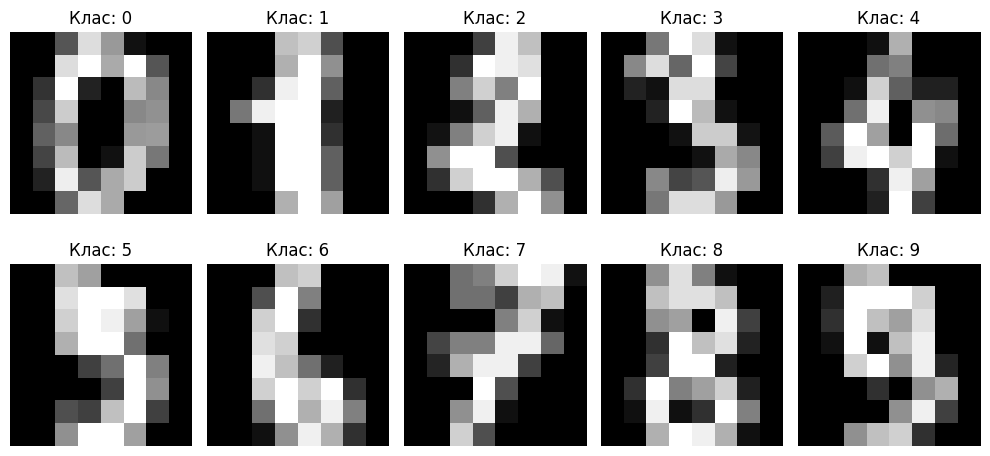

Мінімальне значення після масштабування: 0.0
Максимальне значення після масштабування: 1.0


In [94]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_sc = scaler.fit_transform(X)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_sc[i].reshape(8, 8), cmap='gray')  # Виводимо перші 10 прикладів у вигляді 8x8 зображень
    ax.set_title(f'Клас: {digits.target[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()
print("Мінімальне значення після масштабування:", X_sc.min())
print("Максимальне значення після масштабування:", X_sc.max())

### 2) Розбити данi на навчальний та валiдацiйний набори.

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, random_state=42)

### 3) Побудувати на навчальному наборi даних моделi класифiкацiї або регресiї заданi згiдно з варiантом.

Модель GaussianNB створення та навчання

In [96]:
mod_Gaus = GaussianNB()
mod_Gaus.fit(X_train, y_train)

GaussianNB()

Модель MultinomialNB створення та навчання

In [97]:
mod_Mul = MultinomialNB()
mod_Mul.fit(X_train, y_train)

MultinomialNB()

### 5)Виконати прогнози на основi побудованих моделей.

In [98]:
# Прогнози для тестового набору
y_predtest_Gaus = mod_Gaus.predict(X_test)
y_predtest_Mul = mod_Mul.predict(X_test)

# Виведення прогнозів для тестового набору для перших 10 прикладів
print("Прогнози для тестового набору GaussianNB для перших 10 прикладів:", y_predtest_Gaus[:10])
print("Прогнози для тестового набору MultinomialNB для перших 10 прикладів:", y_predtest_Mul[:10])

# Прогнози для навчального набору
y_predtrain_Gaus = mod_Gaus.predict(X_train)
y_predtrain_Mul = mod_Mul.predict(X_train)

# Виведення прогнозів для навчального наборух для перших 10 прикладів
print("Прогнози для навчального набору GaussianNB для перших 10 прикладів:", y_predtest_Gaus[:10])
print("Прогнози для навчального набору MultinomialNB для перших 10 прикладів:", y_predtest_Mul[:10])

Прогнози для тестового набору GaussianNB для перших 10 прикладів: [6 9 3 7 2 1 5 8 5 2]
Прогнози для тестового набору MultinomialNB для перших 10 прикладів: [6 9 3 7 2 2 5 2 5 2]
Прогнози для навчального набору GaussianNB для перших 10 прикладів: [6 9 3 7 2 1 5 8 5 2]
Прогнози для навчального набору MultinomialNB для перших 10 прикладів: [6 9 3 7 2 2 5 2 5 2]


### 6)Для кожної з моделей оцiнити, чи має мiсце перенавчання.

In [99]:
# Оцінка точності на навчальній та тестовій множинах
train_accuracy_Gaus = mod_Gaus.score(X_train, y_train)
test_accuracy_Gaus = mod_Gaus.score(X_test, y_test)

train_accuracy_Mul = mod_Mul.score(X_train, y_train)
test_accuracy_Mul = mod_Mul.score(X_test, y_test)

print(f"GaussianNB - Точність на навчальному наборі: {train_accuracy_Gaus:.4f}, на тестовому: {test_accuracy_Gaus:.4f}")
print(f"MultinomialNB - Точність на навчальному наборі: {train_accuracy_Mul:.4f}, на тестовому: {test_accuracy_Mul:.4f}")

GaussianNB - Точність на навчальному наборі: 0.8302, на тестовому: 0.8333
MultinomialNB - Точність на навчальному наборі: 0.9068, на тестовому: 0.9056


Як можна побачити відсоток правильних відповідей є доволі високим як на валідаційному так і на тестовому наборі. Також відсоток правильних відповідей на тестовому наборі не є значно меншим ніж на навчальному, що свідчить про відсутність перенавчання моделі. 
Причому модель MultinomialNB дає кращий результат ніж GaussianNB. 

### 7) Розрахувати додатковi результати моделей, згiдно з варiантом. Варіант 11 - Для кожної моделi розрахувати апостерiорнi iмовiрностi для тестового прикладу, використовуючи метод predict_proba.

In [100]:
# Отримуємо ймовірності для тестових прикладів для GaussianNB
proba_gnb = mod_Gaus.predict_proba(X_test)

# Створюємо таблицю для GaussianNB
df_gnb = pd.DataFrame(proba_gnb, columns=[f'Клас {i}' for i in mod_Gaus.classes_])

# Виводимо таблицю ймовірностей для перших 10 прикладів
print("Ймовірності для GaussianNB:")
print(df_gnb.head(10))

Ймовірності для GaussianNB:
          Клас 0         Клас 1         Клас 2         Клас 3        Клас 4  \
0   0.000000e+00   1.102617e-57  2.023302e-112   3.478061e-68  0.000000e+00   
1  2.346055e-238   9.250881e-63   4.365596e-35   2.195249e-21  5.561879e-65   
2   0.000000e+00   9.977972e-52   9.001621e-21   9.997694e-01  0.000000e+00   
3   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00  4.995162e-41   
4   0.000000e+00   0.000000e+00   9.976455e-01   2.253418e-03  0.000000e+00   
5   0.000000e+00   9.895255e-01   1.047453e-02  9.685744e-286  0.000000e+00   
6   0.000000e+00   6.413007e-47   3.366482e-83   4.611163e-43  3.725212e-62   
7   0.000000e+00   2.654581e-02   3.090941e-03   3.037745e-01  0.000000e+00   
8   0.000000e+00  1.619125e-202  1.984609e-104   2.789042e-82  0.000000e+00   
9   0.000000e+00   0.000000e+00   9.990529e-01   4.739222e-07  0.000000e+00   

          Клас 5         Клас 6        Клас 7         Клас 8         Клас 9  
0   0.000000e+00   1.000

In [101]:
# Отримуємо ймовірності для тестових прикладів для MultinomialNB
proba_mnb = mod_Mul.predict_proba(X_test)

# Створюємо таблицю для MultinomialNB
df_mnb = pd.DataFrame(proba_mnb, columns=[f'Клас {i}' for i in mod_Mul.classes_])

# Виводимо таблицю ймовірностей для перших 10 прикладів
print("\nЙмовірності для MultinomialNB:")
print(df_mnb.head(10))


Ймовірності для MultinomialNB:
         Клас 0    Клас 1    Клас 2    Клас 3        Клас 4    Клас 5  \
0  2.269556e-05  0.000769  0.000048  0.000023  8.166006e-05  0.000063   
1  5.167243e-04  0.001749  0.001318  0.085083  1.645813e-04  0.040539   
2  1.449851e-06  0.001217  0.013611  0.909377  8.827405e-07  0.005147   
3  3.132146e-05  0.003870  0.000013  0.000204  2.271616e-03  0.005018   
4  2.395475e-05  0.001107  0.908995  0.031630  2.784240e-07  0.004056   
5  2.603848e-07  0.030405  0.949486  0.000317  2.478765e-07  0.002238   
6  3.021015e-06  0.002625  0.000253  0.000155  3.049980e-05  0.979987   
7  7.889974e-05  0.140740  0.517700  0.204363  1.605678e-04  0.002459   
8  5.141509e-07  0.000409  0.000192  0.000062  1.733982e-05  0.988503   
9  1.307188e-07  0.000072  0.887193  0.086854  8.346763e-07  0.014874   

         Клас 6        Клас 7    Клас 8    Клас 9  
0  9.980629e-01  6.599850e-08  0.000624  0.000306  
1  2.191413e-06  1.736636e-03  0.043066  0.825825  
2  6.565

### 9) В задачах класифiкацiї розрахувати для кожної моделi значення наступних критерiїв якостi, окремо на навчальнiй та валiдацiйнiй множинах:  

• матрицю неточностей (confusion matrix) 
• точнiсть (precision)  
• повноту (recall)  
• мiру F1 (F1 score)  
• побудувати криву точностi-повноти (precision-recall (PR) curve), ROC-криву, показник AUC.

### Для тестового набору:

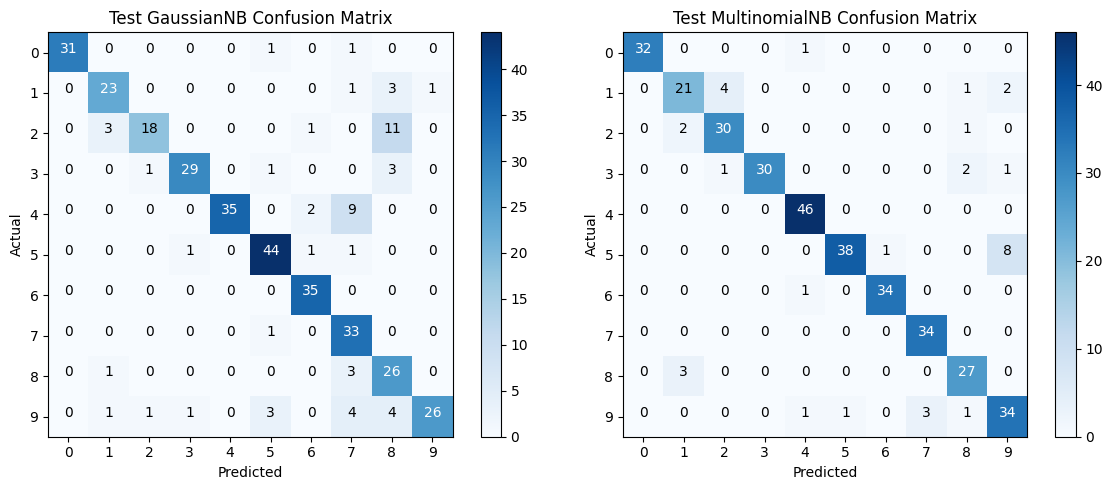

In [103]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score

# Матриця неточностей для GaussianNB
cm_gnbTest = confusion_matrix(y_test, y_predtest_Gaus)
cm_mnbTest = confusion_matrix(y_test, y_predtest_Mul)

# Візуалізація матриць неточностей для GaussianNB та MultinomialNB
def plot_confusion_matrix(cm, title='Confusion matrix'):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, np.unique(y_test))
    plt.yticks(tick_marks, np.unique(y_test))
    
    # Підписуємо осі
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    # Виведення значень у квадратах матриці
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'), 
                 horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

# Побудова матриць неточностей
plt.figure(figsize=(12, 5))

# Матриця для GaussianNB
plt.subplot(1, 2, 1)
plot_confusion_matrix(cm_gnbTest, title='Test GaussianNB Confusion Matrix')

# Матриця для MultinomialNB
plt.subplot(1, 2, 2)
plot_confusion_matrix(cm_mnbTest, title='Test MultinomialNB Confusion Matrix')

plt.show()




In [104]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
accuracyGaussTest = accuracy_score(y_test, y_predtest_Gaus)
precisionGaussTest = precision_score(y_test, y_predtest_Gaus, average='weighted')
recallGaussTest = recall_score(y_test, y_predtest_Gaus, average='weighted')
f1GaussTest = f1_score(y_test, y_predtest_Gaus, average='weighted')

print(f"Метрики для GaussianNB:")
print(f"Точність (Accuracy): {accuracyGaussTest:.4f}")
print(f"Точність (Precision): {precisionGaussTest:.4f}")
print(f"Повнота (Recall): {recallGaussTest:.4f}")
print(f"F1-міра: {f1GaussTest:.4f}")
print("\n")


accuracyMulTest = accuracy_score(y_test, y_predtest_Mul)
precisionMulTest = precision_score(y_test, y_predtest_Mul, average='weighted')
recallMulTest = recall_score(y_test, y_predtest_Mul, average='weighted')
f1MulTest = f1_score(y_test, y_predtest_Mul, average='weighted')

print(f"Метрики для MultinomialNB:")
print(f"Точність (Accuracy): {accuracyMulTest:.4f}")
print(f"Точність (Precision): {precisionMulTest:.4f}")
print(f"Повнота (Recall): {recallMulTest:.4f}")
print(f"F1-міра: {f1MulTest:.4f}")
print("\n")

Метрики для GaussianNB:
Точність (Accuracy): 0.8333
Точність (Precision): 0.8694
Повнота (Recall): 0.8333
F1-міра: 0.8351


Метрики для MultinomialNB:
Точність (Accuracy): 0.9056
Точність (Precision): 0.9102
Повнота (Recall): 0.9056
F1-міра: 0.9057




Побудуємо криву точностi-повноти (precision-recall (PR) curve), ROC-криву, показник AUC для тестового набору за допомоги macro та micro усереднення

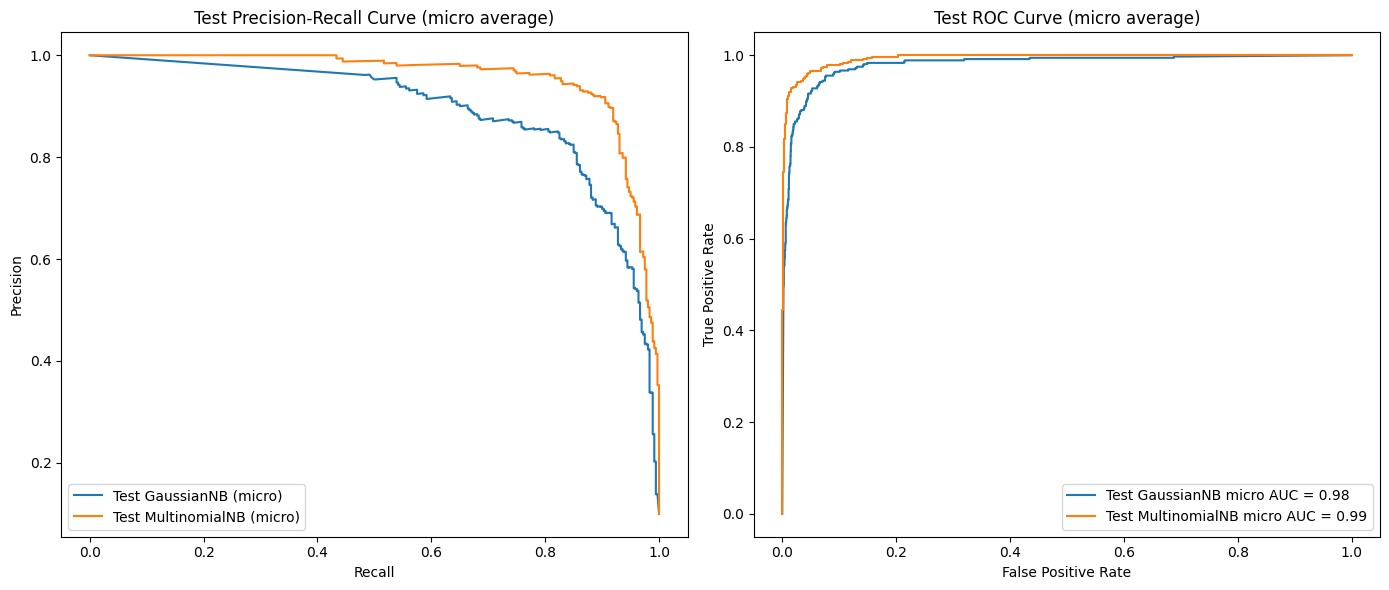

Test GaussianNB macro AUC = 0.98
Test MultinomialNB macro AUC = 0.99


In [105]:
from sklearn.preprocessing import label_binarize

# Бінаризуємо мітки класів (для кожного класу окремо)
y_test_binarized = label_binarize(y_test, classes=np.arange(10))  # 10 класів (від 0 до 9)
n_classes = y_test_binarized.shape[1]

# Ймовірності для ROC та Precision-Recall кривих
proba_gnbTest = mod_Gaus.predict_proba(X_test)
proba_mnbTest = mod_Mul.predict_proba(X_test)

# "micro" усереднення для Precision-Recall та ROC кривих
precision_gnb_microTest, recall_gnb_microTest, _ = precision_recall_curve(y_test_binarized.ravel(), proba_gnbTest.ravel())
fpr_gnb_microTest, tpr_gnb_microTest, _ = roc_curve(y_test_binarized.ravel(), proba_gnbTest.ravel())
roc_auc_gnb_microTest = roc_auc_score(y_test_binarized, proba_gnbTest, average="micro")

precision_mnb_microTest, recall_mnb_microTest, _ = precision_recall_curve(y_test_binarized.ravel(), proba_mnbTest.ravel())
fpr_mnb_microTest, tpr_mnb_microTest, _ = roc_curve(y_test_binarized.ravel(), proba_mnbTest.ravel())
roc_auc_mnb_microTest = roc_auc_score(y_test_binarized, proba_mnbTest, average="micro")

# "macro" усереднення для ROC AUC
roc_auc_gnb_macroTest = roc_auc_score(y_test_binarized, proba_gnbTest, average="macro")
roc_auc_mnb_macroTest = roc_auc_score(y_test_binarized, proba_mnbTest, average="macro")

# Побудова графіків
plt.figure(figsize=(14, 6))

# Precision-Recall крива з усередненням "micro"
plt.subplot(1, 2, 1)
plt.plot(recall_gnb_microTest, precision_gnb_microTest, label=f"Test GaussianNB (micro)")
plt.plot(recall_mnb_microTest, precision_mnb_microTest, label=f"Test MultinomialNB (micro)")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Test Precision-Recall Curve (micro average)')
plt.legend()

# ROC крива з усередненням "micro" та "macro"
plt.subplot(1, 2, 2)
plt.plot(fpr_gnb_microTest, tpr_gnb_microTest, label=f"Test GaussianNB micro AUC = {roc_auc_gnb_microTest:.2f}")
plt.plot(fpr_mnb_microTest, tpr_mnb_microTest, label=f"Test MultinomialNB micro AUC = {roc_auc_mnb_microTest:.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC Curve (micro average)')
plt.legend()

plt.tight_layout()
plt.show()

# Друк macro усереднених AUC результатів
print(f"Test GaussianNB macro AUC = {roc_auc_gnb_macroTest:.2f}")
print(f"Test MultinomialNB macro AUC = {roc_auc_mnb_macroTest:.2f}")


Micro усереднення:

Ми перетворюємо всі передбачення і реальні значення в плоский масив за допомогою ravel() і обчислюємо Precision-Recall та ROC для всіх класів одночасно.
Micro AUC: усереднює метрики за всіма класами, враховуючи вагу кожного прикладу.

Macro усереднення:

Macro AUC: обчислює AUC для кожного класу окремо і потім бере середнє значення для всіх класів.

ROC та Precision-Recall:

Для мікроусереднення будуємо криві для всіх класів одночасно.
AUC виводиться окремо для micro та macro підходів.
Результат:
Precision-Recall крива: Показує, як Precision змінюється в залежності від Recall для всіх класів одночасно з використанням мікроусереднення.
ROC крива: Виводить ROC-криві для всіх класів одночасно (з micro averaging) та показує AUC для кожної моделі.
Macro AUC: Підсумкові AUC для кожної моделі з урахуванням усереднення по всім класам.

### Для навчального набору:

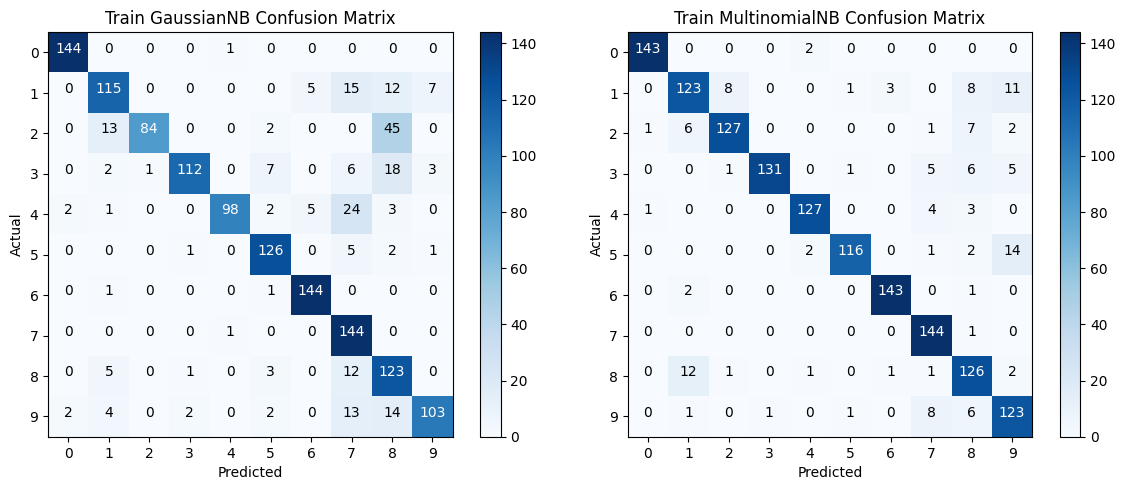

Метрики для GaussianNB:
Точність (Accuracy): 0.8302
Точність (Precision): 0.8657
Повнота (Recall): 0.8302
F1-міра: 0.8321


Метрики для MultinomialNB:
Точність (Accuracy): 0.9068
Точність (Precision): 0.9115
Повнота (Recall): 0.9068
F1-міра: 0.9074




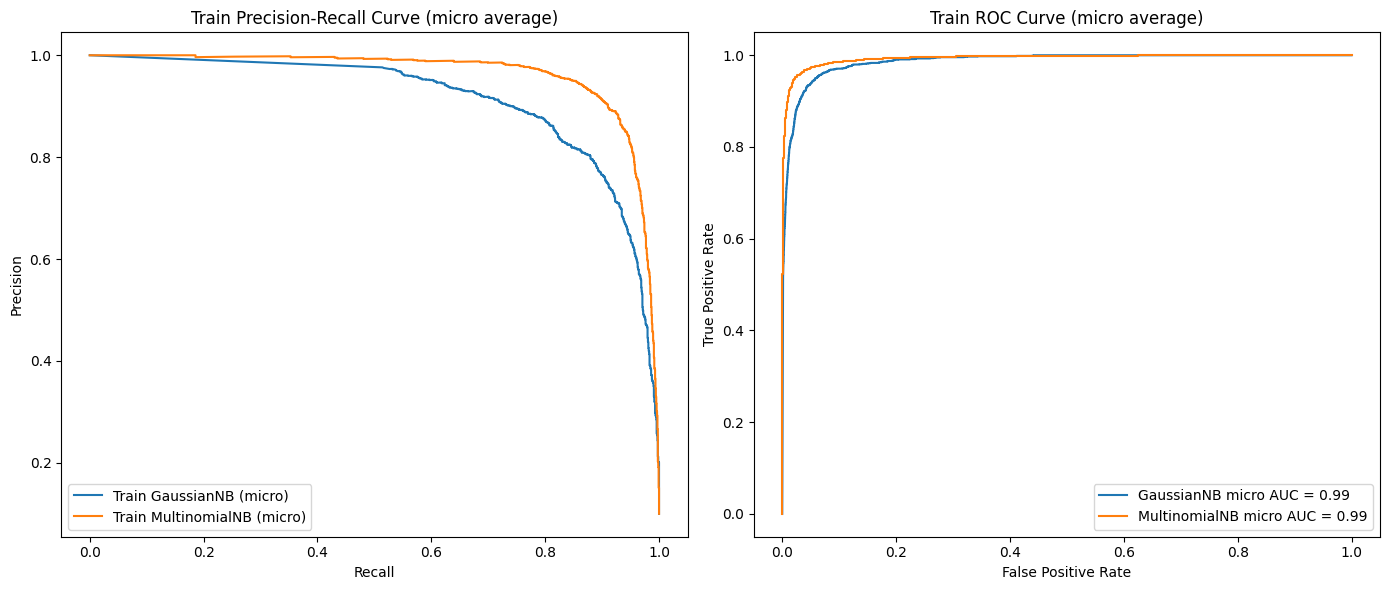

Train GaussianNB macro AUC = 0.99
TrainMultinomialNB macro AUC = 0.99


In [106]:
# Матриця неточностей для GaussianNB
cm_gnbTrain = confusion_matrix(y_train, y_predtrain_Gaus)
cm_mnbTrain = confusion_matrix(y_train, y_predtrain_Mul)

# Візуалізація матриць неточностей для GaussianNB та MultinomialNB
def plot_confusion_matrix(cm, title='Confusion matrix'):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, np.unique(y_test))
    plt.yticks(tick_marks, np.unique(y_test))
    
    # Підписуємо осі
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    # Виведення значень у квадратах матриці
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'), 
                 horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

# Побудова матриць неточностей
plt.figure(figsize=(12, 5))

# Матриця для GaussianNB
plt.subplot(1, 2, 1)
plot_confusion_matrix(cm_gnbTrain, title='Train GaussianNB Confusion Matrix')

# Матриця для MultinomialNB
plt.subplot(1, 2, 2)
plot_confusion_matrix(cm_mnbTrain, title='Train MultinomialNB Confusion Matrix')

plt.show()

accuracyGaussTrain = accuracy_score(y_train, y_predtrain_Gaus)
precisionGaussTrain = precision_score(y_train, y_predtrain_Gaus, average='weighted')
recallGaussTrain = recall_score(y_train, y_predtrain_Gaus, average='weighted')
f1GaussTrain = f1_score(y_train, y_predtrain_Gaus, average='weighted')

print(f"Метрики для GaussianNB:")
print(f"Точність (Accuracy): {accuracyGaussTrain:.4f}")
print(f"Точність (Precision): {precisionGaussTrain:.4f}")
print(f"Повнота (Recall): {recallGaussTrain:.4f}")
print(f"F1-міра: {f1GaussTrain:.4f}")
print("\n")

accuracyMulTrain = accuracy_score(y_train, y_predtrain_Mul)
precisionMulTrain = precision_score(y_train, y_predtrain_Mul, average='weighted')
recallMulTrain = recall_score(y_train, y_predtrain_Mul, average='weighted')
f1MulTrain = f1_score(y_train, y_predtrain_Mul, average='weighted')

print(f"Метрики для MultinomialNB:")
print(f"Точність (Accuracy): {accuracyMulTrain:.4f}")
print(f"Точність (Precision): {precisionMulTrain:.4f}")
print(f"Повнота (Recall): {recallMulTrain:.4f}")
print(f"F1-міра: {f1MulTrain:.4f}")
print("\n")

# Бінаризуємо мітки класів (для кожного класу окремо)
y_train_binarized = label_binarize(y_train, classes=np.arange(10))  # 10 класів (від 0 до 9)
n_classes = y_train_binarized.shape[1]

# Ймовірності для ROC та Precision-Recall кривих
proba_gnbTrain = mod_Gaus.predict_proba(X_train)
proba_mnbTrain = mod_Mul.predict_proba(X_train)

# "micro" усереднення для Precision-Recall та ROC кривих
precision_gnb_microTrain, recall_gnb_microTrain, _ = precision_recall_curve(y_train_binarized.ravel(), proba_gnbTrain.ravel())
fpr_gnb_microTrain, tpr_gnb_microTrain, _ = roc_curve(y_train_binarized.ravel(), proba_gnbTrain.ravel())
roc_auc_gnb_microTrain = roc_auc_score(y_train_binarized, proba_gnbTrain, average="micro")

precision_mnb_microTrain, recall_mnb_microTrain, _ = precision_recall_curve(y_train_binarized.ravel(), proba_mnbTrain.ravel())
fpr_mnb_microTrain, tpr_mnb_microTrain, _ = roc_curve(y_train_binarized.ravel(), proba_mnbTrain.ravel())
roc_auc_mnb_microTrain = roc_auc_score(y_train_binarized, proba_mnbTrain, average="micro")

# "macro" усереднення для ROC AUC
roc_auc_gnb_macroTrain = roc_auc_score(y_train_binarized, proba_gnbTrain, average="macro")
roc_auc_mnb_macroTrain = roc_auc_score(y_train_binarized, proba_mnbTrain, average="macro")

# Побудова графіків
plt.figure(figsize=(14, 6))

# Precision-Recall крива з усередненням "micro"
plt.subplot(1, 2, 1)
plt.plot(recall_gnb_microTrain, precision_gnb_microTrain, label=f"Train GaussianNB (micro)")
plt.plot(recall_mnb_microTrain, precision_mnb_microTrain, label=f"Train MultinomialNB (micro)")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Train Precision-Recall Curve (micro average)')
plt.legend()

# ROC крива з усередненням "micro" та "macro"
plt.subplot(1, 2, 2)
plt.plot(fpr_gnb_microTrain, tpr_gnb_microTrain, label=f"GaussianNB micro AUC = {roc_auc_gnb_microTrain:.2f}")
plt.plot(fpr_mnb_microTrain, tpr_mnb_microTrain, label=f"MultinomialNB micro AUC = {roc_auc_mnb_microTrain:.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train ROC Curve (micro average)')
plt.legend()

plt.tight_layout()
plt.show()

# Друк macro усереднених AUC результатів
print(f"Train GaussianNB macro AUC = {roc_auc_gnb_macroTrain:.2f}")
print(f"TrainMultinomialNB macro AUC = {roc_auc_mnb_macroTrain:.2f}")

### 11) Спробувати виконати решiтчастий пошук (grid search) для пiдбору гiперпараметрiв моделей.

In [107]:
# Для GaussianNB
params_gnb = {'var_smoothing': np.logspace(0, -9, 100)}
grid_gnb = GridSearchCV(GaussianNB(), param_grid=params_gnb, cv=5, scoring='accuracy')
grid_gnb.fit(X_train, y_train)
print("Best parameters for GaussianNB:", grid_gnb.best_params_)
print("Best cross-validated accuracy (GaussianNB):", grid_gnb.best_score_)

# Для MultinomialNB
params_mnb = {'alpha': np.logspace(0, -5, 100)}
grid_mnb = GridSearchCV(MultinomialNB(), param_grid=params_mnb, cv=5, scoring='accuracy')
grid_mnb.fit(X_train, y_train)
print("Best parameters for MultinomialNB:", grid_mnb.best_params_)
print("Best cross-validated accuracy (MultinomialNB):", grid_mnb.best_score_)

Best parameters for GaussianNB: {'var_smoothing': np.float64(0.1)}
Best cross-validated accuracy (GaussianNB): 0.9199767711962835
Best parameters for MultinomialNB: {'alpha': np.float64(1.0)}
Best cross-validated accuracy (MultinomialNB): 0.8991023035230352


### 12) Зробити висновки про якiсть роботи моделей на дослiджених даних. На основi критерiїв якостi спробувати обрати найкращу модель.

Як можна бачити з показників в пункті 9 на данному наборі даних модель MultinomialNB переважає GaussianNB по всіх показниках якості, тобто в даному випадку поліноміальна модель є оптимальнішою за гаусівську.

### 13) Навчити моделi на пiдмножинах навчальних даних. Оцiнити, наскiльки розмiр навчальної множини впливає на якiсть моделi.

In [108]:
# Розбиття даних на навчальний і тестовий набори
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_sc, y, test_size=0.3, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_sc, y, test_size=0.3, random_state=42)

# Навчання моделей на підмножинах

X_train_part1, _, y_train_part1, _ = train_test_split(X_train1, y_train1, train_size=0.5, random_state=42) # Навчальні набори 50% та 90%
X_train_part2, _, y_train_part2, _ = train_test_split(X_train2, y_train2, train_size=0.9, random_state=42)

# Навчання GaussianNB на підмножинах
gnb1 = GaussianNB()
gnb1.fit(X_train_part1, y_train_part1)

gnb2 = GaussianNB()
gnb2.fit(X_train_part2, y_train_part2)
 
# Навчання MultinomialNB на підмножині
mnb1 = MultinomialNB()
mnb1.fit(X_train_part1, y_train_part1)

mnb2 = MultinomialNB()
mnb2.fit(X_train_part2, y_train_part2)

print("test score Gauss200: ", gnb1.score(X_test1, y_test1))
print("test score Gauss900: ", gnb2.score(X_test2, y_test2))
print("test score Polinom200: ", mnb1.score(X_test1, y_test1))
print("test score Polinom900: ", mnb2.score(X_test2, y_test2))

test score Gauss200:  0.8333333333333334
test score Gauss900:  0.8444444444444444
test score Polinom200:  0.8833333333333333
test score Polinom900:  0.8925925925925926


Як можна бачити розмір навчальної вибірки позитивно впливає на подальшу роботу обох моделей

### 4) Представити моделi графiчно

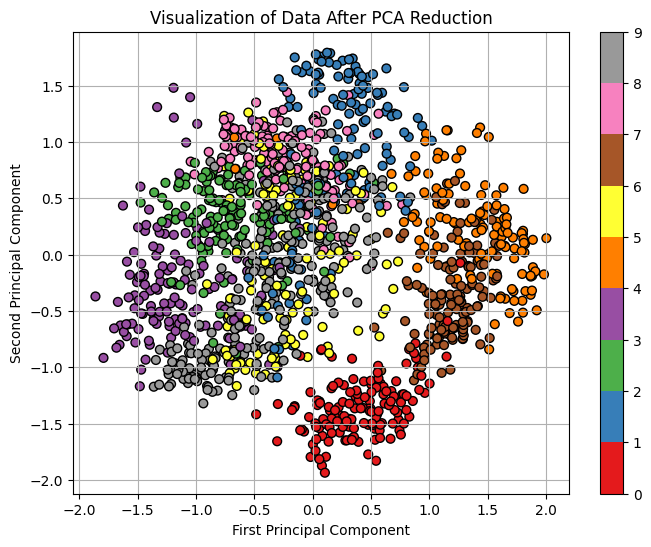

In [112]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Використовуємо PCA для зменшення вимірності до 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Візуалізація даних після зменшення вимірності
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.title("Visualization of Data After PCA Reduction")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)
plt.grid(True)
plt.show()


Оскільки оригінальні дані мають багато ознак (64 для кожного прикладу), ми використаємо метод головних компонент (PCA), щоб зменшити їх до двох головних компонент для візуалізації.

### 8. В задачах класифiкацiї побудувати границi рiшень графiчно для кожної з моделей.

Зменшимо розмірність даних до 2D за допомогою PCA та перевіримо, що дані після цього залишились додатніми:

In [109]:
from sklearn.preprocessing import MinMaxScaler
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)
scaler_pca = MinMaxScaler()
X_train_2d_sc = scaler_pca.fit_transform(X_train_2d)
X_test_2d_sc = scaler_pca.transform(X_test_2d)

Підганяємо GaussianNB та MultinomialNB на 2D даних:

In [110]:
mod_Gaus.fit(X_train_2d_sc, y_train)
mod_Mul.fit(X_train_2d_sc, y_train)

MultinomialNB()

Визначаємо межі для побудови сітки:

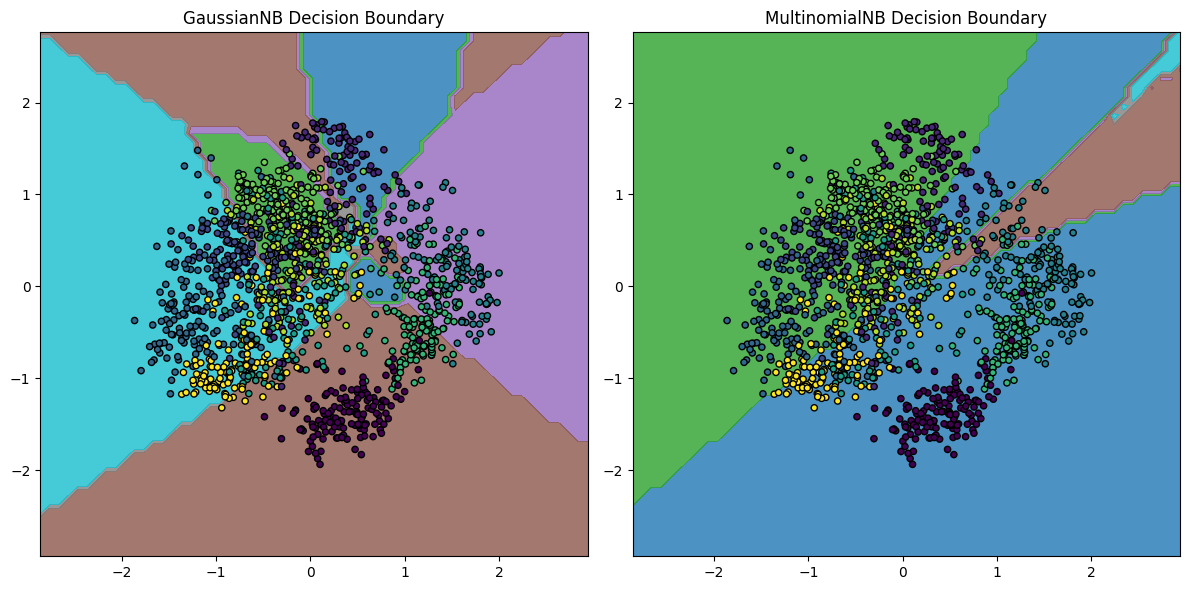

In [111]:
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
# Прогнози для кожної точки сітки
Z_gnb = mod_Gaus.predict(np.c_[xx.ravel(), yy.ravel()])
Z_mnb = mod_Mul.predict(np.c_[xx.ravel(), yy.ravel()])

Z_gnb = Z_gnb.reshape(xx.shape)
Z_mnb = Z_mnb.reshape(xx.shape)

# Візуалізація меж рішень
plt.figure(figsize=(12, 6))

# GaussianNB
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_gnb, alpha=0.8, cmap='tab10')#ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolor='k', s=20)
plt.title("GaussianNB Decision Boundary")

# MultinomialNB
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_mnb, alpha=0.8, cmap='tab10')#ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolor='k', s=20)
plt.title("MultinomialNB Decision Boundary")

plt.tight_layout()
plt.show()